In [117]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, OneHotEncoder
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('seaborn-white')

In [28]:
df_credit = pd.read_csv('Data/Credit.csv', index_col=0)
df_credit["Gender"] = df_credit["Gender"].astype('category')
df_credit["Student"] = df_credit["Student"].astype('category')
df_credit["Married"] = df_credit["Married"].astype('category')
df_credit["Ethnicity"] = df_credit["Ethnicity"].astype('category')
df_credit.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [29]:
df_credit.describe(include='category')

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


In [44]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null category
Student      400 non-null category
Married      400 non-null category
Ethnicity    400 non-null category
Balance      400 non-null int64
dtypes: category(4), float64(1), int64(6)
memory usage: 26.9 KB


# 6.2 Shrinkage Methods

## 6.2.1 Ridge Regression

In [144]:
y = df_credit.Balance

X = df_credit[df_credit.columns.difference(['Balance'])]
# Use K-1 columns for K categories so Yes/No uses only one column 0/1
X = pd.get_dummies(X, drop_first=True)
X.head(3)

,Age,Cards,Education,Income,Limit,Rating,Ethnicity_Asian,Ethnicity_Caucasian,Gender_Female,Married_Yes,Student_Yes
1,34,2,11,14.891,3606,283,0,1,0,1,0
2,82,3,15,106.025,6645,483,1,0,1,1,1
3,71,4,11,104.593,7075,514,1,0,0,0,0


In [145]:
n_alphas = 200
alphas = np.logspace(5, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    # it's very important to scale the data for Ridge regression
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

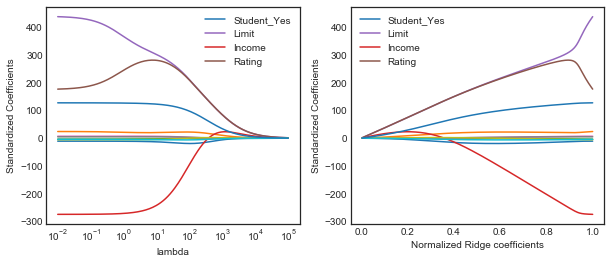

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# get the four largest (in abs value) coefficient positions
ind = np.argpartition(np.abs(coefs[-1]), -4)[-4:]

# firt plot
ax1.plot(alphas, coefs)
ax1.set_xscale('log')
ax1.set_xlabel('lambda')
ax1.set_ylabel('Standardized Coefficients')
ax1.legend(np.array(ax1.get_lines())[ind], X.columns[ind])

# second plot
no_ridge_norm = linalg.norm(coefs[-1])
norm_coefs = linalg.norm(coefs/no_ridge_norm, axis=1)
ax2.plot(norm_coefs, coefs)
ax2.set_xlabel('Normalized Ridge coefficients')
ax2.set_ylabel('Standardized Coefficients')
ax2.legend(np.array(ax2.get_lines())[ind], X.columns[ind]);

## 6.2.2 The Lasso